### What are simulations?

A simulation is simply an imitation of a situation or a process.



### Simulations are useful for a number of reasons:

1. They can turn into powerful visualizations that make it easier to communicate insights and findings.

2. They can be used for predictions and forecasting.

3. They can help you understand the most important factors in a simulation. (Eg. How does a 1% change in factor A affect the output vs a 1% change in factor B?)

In [7]:
! pip install simpy

In [1]:
import simpy

https://jckantor.github.io/cbe30338-2021/07.01-Introduction-to-Simpy.html

In Python, we can use SimPy framework for event simulation.

## 1. creating and runing an environment:

In [2]:
env = simpy.Environment()
print("time = ", env.now)
env.run()

time =  0


## 2. Creating simulation processes

Processes are implemented with the Python yield statement, and attached to the simulation environment with env.process()

In [3]:
import simpy

def print_msg():
    yield env.timeout(2.0)
    print("time = ", env.now, ":Hello World.")
    
env = simpy.Environment()
env.process(print_msg())
env.run()

time =  2.0 :Hello World.


In [4]:
import simpy

def test_msg(delay, msg):
    yield env.timeout(delay)
    print(f"time {delay}: {msg}")

          
env = simpy.Environment()

env.process(test_msg(1, "Hello World"))
env.process(test_msg(4.2, "Hello China"))
env.process(test_msg(5.5, "Hi, UK"))
          
env.run()

time 1: Hello World
time 4.2: Hello China
time 5.5: Hi, UK


## 3. Event
Simpy includes many different event types that are managed by the simulation environment

The env.timeout(delay) demonstrated above is a mainstay in Simpy models.

In [5]:
import simpy

def print_msg(delay,msg):
    yield env.timeout(delay)
    print(f"time {delay}: {msg}")


def final_msg(msg,list_of_processes):
    yield simpy.AllOf(env, list_of_processes)
    print(env.now, msg)
                      
env = simpy.Environment()

# create multiple unique instances of the process model
a= env.process(test_msg(2, "Hello World"))
b= env.process(test_msg(1.2, "Hello China"))
c= env.process(test_msg(5.5, "Hi, UK"))
# will directly output by the delay time.
# because timeout means 'an event trigger after delay has passed'

env.process(final_msg("All done", [a, b, c]))

env.run()
          

time 1.2: Hello China
time 2: Hello World
time 5.5: Hi, UK
5.5 All done


## 4. Ready to Roomba

autonomous robotic vacuum cleaners

In [6]:
import simpy 

def roomba(name):
    print(f"{env.now:3d}:{name} starts cleaning.")
    yield env.timeout(20)
    print(f"{env.now:3d}:{name} battery dies.")
    
env = simpy.Environment()
env.process(roomba("A"))
env.run()

  0:A starts cleaning.
 20:A battery dies.


 35: 1 start charging.
 40: 1 finished charging.
 40: 2 start charging.
 45: 2 finished charging.
 45: 3 start charging.
 50: 3 finished charging.
 50: 4 start charging.
 55: 4 finished charging.
 55: 5 start charging.
 60: 5 finished charging.
 60: 6 start charging.
 65: 6 finished charging.
 65: 7 start charging.
 70: 7 finished charging.
 70: 8 start charging.
 75: 8 finished charging.
 75: 9 start charging.
 80: 9 finished charging.
 80: 10 start charging.
 85: 10 finished charging.
 85: 11 start charging.
 90: 11 finished charging.
 90: 12 start charging.
 95: 12 finished charging.
 95: 13 start charging.
100: 13 finished charging.
100: 14 start charging.
105: 14 finished charging.
105: 15 start charging.
110: 15 finished charging.
110: 16 start charging.
115: 16 finished charging.
115: 17 start charging.
120: 17 finished charging.
120: 18 start charging.
125: 18 finished charging.
125: 19 start charging.
130: 19 finished charging.
130: 20 start charging.
135: 20 finished charging

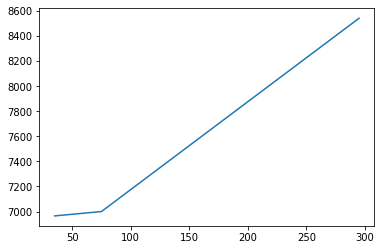

In [9]:
import simpy
import matplotlib.pyplot as plt

total_cleaning_time = 0
cleaning = {}

def roomba(name,battery):
    global cleaning, total_cleaning_time # very important
    while True:
        start = env.now
        yield env.timeout(battery)
        
        stop = env.now
        total_cleaning_time = total_cleaning_time + stop - start
        cleaning[env.now] = total_cleaning_time
        # dictionary_name[key] = value
        
        request = charger.request()
        yield request
        
        print(f"{env.now:3d}: {name} start charging.")
        yield env.timeout(5)
        print(f"{env.now:3d}: {name} finished charging.")
        
        charger.release(request)
        
env = simpy.Environment()
charger = simpy.Resource(env,capacity = 1)

for n in range(1, 200):
    env.process(roomba(n,35))
env.run(until=300)

print("This is cleaning:", cleaning)
plt.plot(cleaning.keys(),cleaning.values())



# Building Simulations in Python — A Step by Step Walkthrough

https://towardsdatascience.com/building-simulations-in-python-a-complete-walkthrough-3965b2d3ede0

### The most basic simulation

The most basic human population simulator that we could possibly create would be something like this, where the initial population is 50 and we want to see how the population grows to 1,000,000:

In [12]:
totalPopulation = 50
growthFactor = 1.00005
dayCount = 0 

while totalPopulation < 1000000:
    totalPopulation = totalPopulation* growthFactor
    
    # Every 365th day, population is reported
    dayCount  = dayCount + 1
    if dayCount == 365:
        dayCount = 0
        print(totalPopulation)

50.9208542158382
51.858667881412835
52.813753340339744
53.786428688693455
54.777017880950645
55.785850837884915
56.81326355644857
57.85959822167812
58.925203320660756
60.01043375859973
61.11565097701727
62.241223074134794
63.38752492746948
64.55493831868948
65.74385206076818
66.95466212748006
68.18777178528205
69.4435917276238
70.72254021173039
72.02504319790533
73.35153449139965
74.70245588689163
76.07825731562963
77.47939699528389
78.90634158255773
80.35956632861088
81.83955523734335
83.3468012265958
84.88180629231839
86.44508167576318
88.03714803375506
89.65853561210007
91.3097844221855
92.99144442083431
94.70407569347027
96.44824864065797
98.2245441680769
100.03355387999595
101.8758802763092
103.75213695320225
105.66294880751367
107.60895224485932
109.59079539159139
111.60913831065932
113.66465322144792
115.75802472366284
117.88995002534043
120.06113917505603
122.27231529840951
124.52421483886611
126.81758780303201
129.15319801044888
131.53182334798672
133.95425602892402
136.421302

### Adding More Variables to the Simulation

If we want to run a more realistic simulation of the human population, we’ll need to establish some factors and use them to control when people are born, reproduce, and die.

##### I’ve chosen eight very simple factors:

Starting population

Infant mortality

Food

Fertility x & Fertility y

Healthcare

Agriculture

Chance of disaster

Age of death.


In [13]:
import random

startingPopulation = 50
infantMortality = 25
agriculture = 5
disasterChance = 10
food = 0
fertilityx = 18
fertilityy = 35
# These are the ages at which a women can become pregnant in our simulation.
peopleDictionary = []

All “able” people, that is, anyone over 8 years old, works in the fields to produce food. This includes both men and women for simplicity.

A certain number of women in the fertility band give birth to babies every year.

Anyone over eighty years old dies.


In [20]:
class Person:
    def __init__(self, age):
        self.gender = random.randint(0,1)
        self.age = age
        self.pregnant = 0
def harvest(food, agriculture):
    ablePeople = 0
    for person in peopleDictionary:
        if person.age > 8:
            ablePeople = ablePeople + 1
food = food +  ablePeople * agriculture

    if food < len(peopleDictionary):
        del peopleDictionary[0:int(len(peopleDictionary)-food)]
        food = 0
    else:
        food = food - len(peopleDictionary)
def reproduce(fertilityx, fertilityy, infantMortality):
    for person in peopleDictionary:
        if person.gender == 1:
            if person.age > fertilityx:
                if person.age < fertilityy:
                    if random.randint(0,5)==1:
                        if random.randint(0,100)>infantMortality:
                            peopleDictionary.append(Person(0))
def beginSim():
    for x in range(startPopulation):
        peopleDictionary.append(Person(random.randint(18,50)))
        
def runYear(food, agriculture, fertilityx, fertilityy, infantMortality, disasterChance):
    harvest(food, agriculture)
    for person in peopleDictionary:
        if person.age > 80:
            peopleDictionary.remove(person)
        else:
            person.age = person.ag + 1
    
    reproduce(fertilityx, fertilityy, infantMortality)

if random.randint(0,100)<disasterChance:
        del peopleDictionary[0:int(random.uniform(0.05,0.2)*len(peopleDictionary))]
        print(len(peopleDictionary))
        infantMortality = infantMortality * 0.985
        return infantMortality

beginSim()
while len(peopleDictionary)<100000 and len(peopleDictionary) > 1:
    infantMortality = runYear(food, agriculture, fertilityx, fertilityy, infantMortality, disasterChance)

IndentationError: unexpected indent (3080339994.py, line 13)

# SimPy: Simulating Real-World Processes With Python

https://www.zditect.com/code/python/simpy-simulating-realworld-processes-with-python.html

Examples:
    
    Car wash
    
    Airport Security Check
    
    Call center Speak with a telemaker

## How simulation works

In Python, you can use SimPy framework.

In [94]:
# Set up the environment
env = simpy.Environment()

# Assume you've defined checkpoint_run() beforehand
env.process(checkpoint_run(env, num_booths, check_time, passenger_arrival))

# Let's go!
env.run(until=10)

NameError: name 'checkpoint_run' is not defined

env: the environment object to schedule and process events
    
num_booths: the number of ID check booths
    
check_time: the length of time it takes to check a passenger’s ID
    
passenger_arrival: the rate at which passengers arrive at the queue

### Three steps to running a simulation in Python:

1. Establish the environment.

2. Pass in the parameters.

3. Run the simulation.

### Condition: Theather

1. Arrive at the theater, get in line, and wait to purchase a ticket.

2. Buy a ticket from the box office.

3. Wait in line to have the ticket checked.

4. Get the ticket checked by an usher.

5. Choose whether or not to get in line for the concession stand:

   If they get in line, then they purchase food.
   
   If they don’t get in line, then they skip to the last step.
   
6. Go find their seat.


In [170]:
import simpy 
import random
import statistics

### Goal:
 find the optimal number of employees that gives an average wait time of less than 10 minutes. 

In [171]:
wait_times = []

In [172]:
# Step 1: Creating the Environment: Class Definition

class Theater():
    def __init__(self, env, num_cashiers, num_servers, num_ushers):
        self.env = env
        self.cashier = simpy.Resource(env, num_cashiers) # NOTICE: all of these are resources
        self.server = simpy.Resource(env, num_servers)  # syntax: simpy.Resource(environment, parameter)
        self.usher = simpy.Resource(env, num_ushers)

    def purchase_ticket(self, moviegoer):
        yield self.env.timeout(random.randint(1, 3))  # assume the wait time for ticket is 1 or 2 mins

    def check_ticket(self, moviegoer):
        yield self.env.timeout(3 / 60)

    def sell_food(self, moviegoer):
        yield self.env.timeout(random.randint(1, 5))

In [173]:
# Step 2: Moving through the environment function: Function Definition

def go_to_movies(env, moviegoer, theater):
    # Moviegoer arrives at the theater
    arrival_time = env.now

    with theater.cashier.request() as request:
        yield request
        yield env.process(theater.purchase_ticket(moviegoer)) # call the function defined in the class
                                                              # syntax: env.process(env, generator, any, any)

    with theater.usher.request() as request:
        yield request
        yield env.process(theater.check_ticket(moviegoer))

    if random.choice([True, False]):  # buying food or not, same as if random.choice([True, False]) == True:
        with theater.server.request() as request:
            yield request
            yield env.process(theater.sell_food(moviegoer))

    # Moviegoer heads into the theater
    wait_times.append(env.now - arrival_time)

In [174]:
# Step 3: make things happen: function definition

def run_theater(env, num_cashiers, num_servers, num_ushers): # (env, the paramters we used)
    theater = Theater(env, num_cashiers, num_servers, num_ushers)

    for moviegoer in range(5):
        env.process(go_to_movies(env, moviegoer, theater)) # call the function defined in step 2

    while True: # can be eliminated
        yield env.timeout(0.20)  # Wait a bit before generating a new person

        moviegoer += 1
        env.process(go_to_movies(env, moviegoer, theater))    

In [175]:
# Step 4: Calculating the Wait time: function definition

def get_average_wait_time(arrival_times, departure_times):
    average_wait = statistics.mean(wait_times)
    # Pretty print the results
    minutes, frac_minutes = divmod(average_wait, 1) # print Quotient and Remainder
    seconds = frac_minutes * 60
    return round(minutes), round(seconds)
    

In [176]:
# Step 5: Choosing Parameters: Function Definition

def get_user_input():
    num_cashiers = input("Input # of cashiers working: ")
    num_servers = input("Input # of servers working: ")
    num_ushers = input("Input # of ushers working: ")
    params = [num_cashiers, num_servers, num_ushers]
    if all(str(i).isdigit() for i in params):  # Check input is valid
        params = [int(x) for x in params]
    else:
        print(
            "Could not parse input. The simulation will use default values:",
            "\n1 cashier, 1 server, 1 usher.",
        )
        params = [1, 1, 1]
    return params

In [177]:
# Step 6: Finalizing the Setup: Main Function Definition

def test():
  # Setup
  random.seed(42)
  num_cashiers, num_servers, num_ushers = get_user_input()

  # Run the simulation
  env = simpy.Environment()
  env.process(run_theater(env, num_cashiers, num_servers, num_ushers))
  env.run(until=90)

  # View the results
  mins, secs = get_average_wait_time(wait_times)
  print(
      "Running simulation...",
      f"\nThe average wait time is {mins} minutes and {secs} seconds.",
  )

In [178]:
# Step 7: How to run the simulation

if __name__ == '__main__':
    test()

Input # of cashiers working: 8
Input # of servers working: 4
Input # of ushers working: 6
Running simulation... 
The average wait time is 16 minutes and 57 seconds.


# Conclusion

### 1. Theater: 
This class definition serves as a blueprint for the environment you want to simulate. It determines some information about that environment, like what kinds of resources are available, and what processes are associated with them.

### 2. go_to_movies():
This function makes explicit requests to use a resource, goes through the associated process, and then releases it to the next moviegoer.

### 3. run_theater():
This function controls the simulation. 

It uses the Theater class blueprint to create an instance of a theater, and then calls on go_to_movies() to generate and move people through the theater.

### 4. get_average_wait_time():
This function finds the average time it takes a moviegoer to make it through the theater.

### 5. calculate_wait_time(): 
This function ensures the final output is easy for the user to read.

### 6. get_user_input(): 
This function allows the user to define some parameters, like how many cashiers are available.

### 7. main(): 
This function ensures that your script runs properly in the command line.